In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df=pd.read_csv('supply_train.csv')

In [3]:
df.head(10)

,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071
5,5,WH_100005,EID_50005,Rural,Small,West,Zone 1,8,0,2,...,1,152,35.0,2009.0,23,1,A+,3,3,32134
6,6,WH_100006,EID_50006,Rural,Large,West,Zone 6,8,0,4,...,1,77,27.0,2010.0,24,0,B,3,6,30142
7,7,WH_100007,EID_50007,Rural,Large,North,Zone 5,1,0,4,...,0,241,23.0,NaN,18,0,C,6,24,24093
8,8,WH_100008,EID_50008,Rural,Small,South,Zone 6,8,1,4,...,1,124,22.0,2013.0,13,1,A+,5,2,18082
9,9,WH_100009,EID_50009,Rural,Small,South,Zone 6,4,3,3,...,0,78,43.0,NaN,6,0,C,6,2,7130


In [4]:
df.shape

(16620, 25)

In [5]:
type(df)

pandas.core.frame.DataFrame

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    16620 non-null  int64  
 1   Ware_house_ID                 16620 non-null  object 
 2   WH_Manager_ID                 16620 non-null  object 
 3   Location_type                 16620 non-null  object 
 4   WH_capacity_size              16620 non-null  object 
 5   zone                          16620 non-null  object 
 6   WH_regional_zone              16620 non-null  object 
 7   num_refill_req_l3m            16620 non-null  int64  
 8   transport_issue_l1y           16620 non-null  int64  
 9   Competitor_in_mkt             16620 non-null  int64  
 10  retail_shop_num               16620 non-null  int64  
 11  wh_owner_type                 16620 non-null  object 
 12  distributor_num               16620 non-null  int64  
 13  f

In [7]:
df.isna().any()

Unnamed: 0                      False
Ware_house_ID                   False
WH_Manager_ID                   False
Location_type                   False
WH_capacity_size                False
zone                            False
WH_regional_zone                False
num_refill_req_l3m              False
transport_issue_l1y             False
Competitor_in_mkt               False
retail_shop_num                 False
wh_owner_type                   False
distributor_num                 False
flood_impacted                  False
flood_proof                     False
electric_supply                 False
dist_from_hub                   False
workers_num                      True
wh_est_year                      True
storage_issue_reported_l3m      False
temp_reg_mach                   False
approved_wh_govt_certificate     True
wh_breakdown_l3m                False
govt_check_l3m                  False
product_wg_ton                  False
dtype: bool

In [8]:
df.isna().sum()

Unnamed: 0                         0
Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

In [9]:
Avg_num_workers=df.groupby('WH_capacity_size')['workers_num'].mean()

In [10]:
Avg_num_workers

WH_capacity_size
Large    29.009596
Mid      28.697609
Small    29.155410
Name: workers_num, dtype: float64

In [11]:
df['workers_num']=df['workers_num'].replace(to_replace=np.nan,value=29)

In [12]:
df['wh_est_year']=df['wh_est_year'].replace(to_replace=np.nan,value=0)

In [13]:
df['approved_wh_govt_certificate']=df['approved_wh_govt_certificate'].replace(to_replace=np.nan,value='Not Issued')

In [14]:
df.isna().sum()

Unnamed: 0                      0
Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [15]:
import seaborn as sns

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,16620.0,8309.500000,4797.925072,0.0,4154.75,8309.5,12464.25,16619.0
num_refill_req_l3m,16620.0,4.126655,2.606241,0.0,2.00,4.0,6.00,8.0
transport_issue_l1y,16620.0,0.780927,1.206351,0.0,0.00,0.0,1.00,5.0
Competitor_in_mkt,16620.0,3.103129,1.147711,0.0,2.00,3.0,4.00,12.0
retail_shop_num,16620.0,4983.904994,1051.032239,1821.0,4309.00,4856.0,5500.00,11008.0
distributor_num,16620.0,42.473706,16.090000,15.0,29.00,42.0,56.00,70.0
flood_impacted,16620.0,0.096871,0.295791,0.0,0.00,0.0,0.00,1.0
flood_proof,16620.0,0.056017,0.229961,0.0,0.00,0.0,0.00,1.0
electric_supply,16620.0,0.655716,0.475149,0.0,0.00,1.0,1.00,1.0
dist_from_hub,16620.0,163.521901,62.701193,55.0,109.00,164.0,218.00,271.0


In [17]:
df.columns

Index(['Unnamed: 0', 'Ware_house_ID', 'WH_Manager_ID', 'Location_type',
       'WH_capacity_size', 'zone', 'WH_regional_zone', 'num_refill_req_l3m',
       'transport_issue_l1y', 'Competitor_in_mkt', 'retail_shop_num',
       'wh_owner_type', 'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

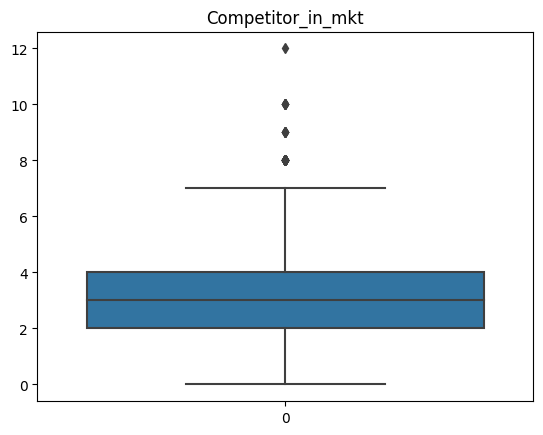

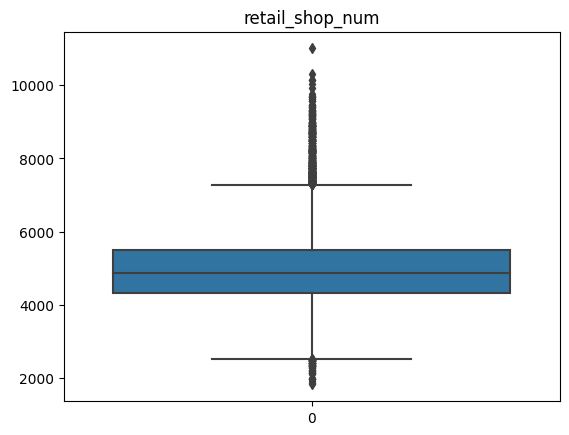

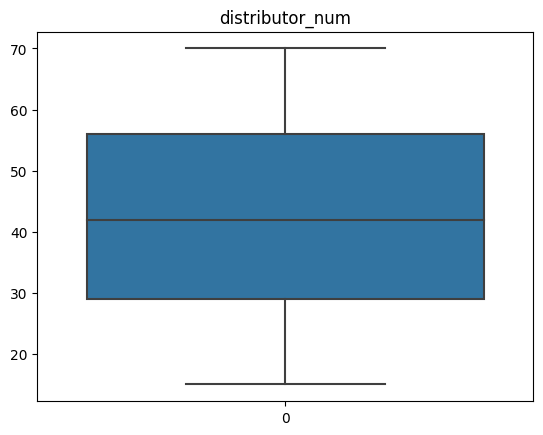

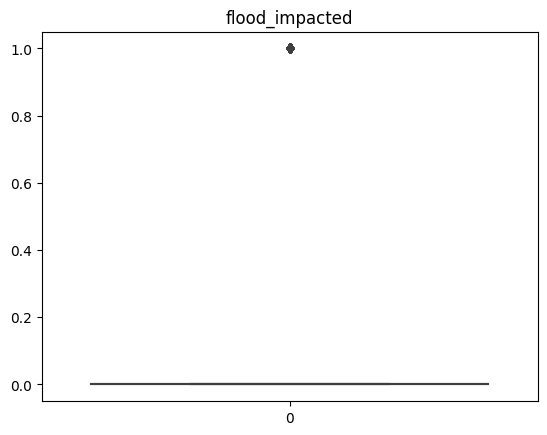

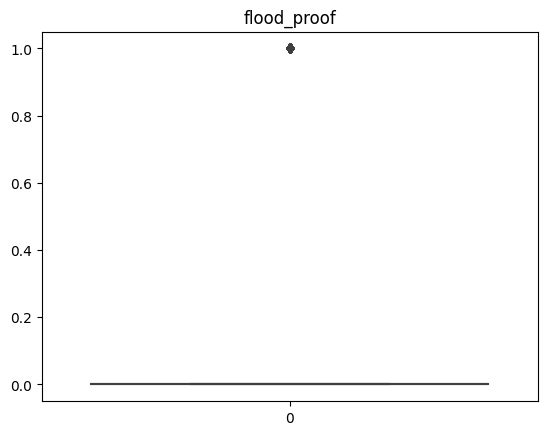

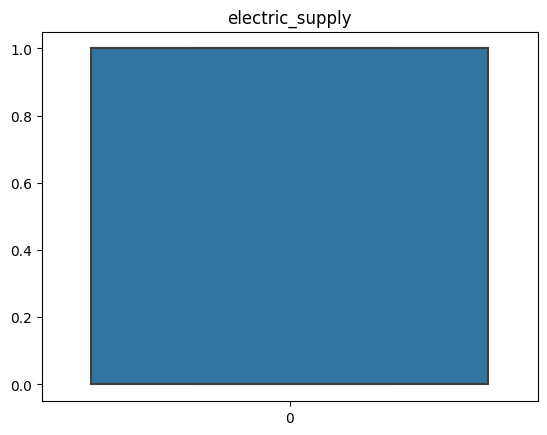

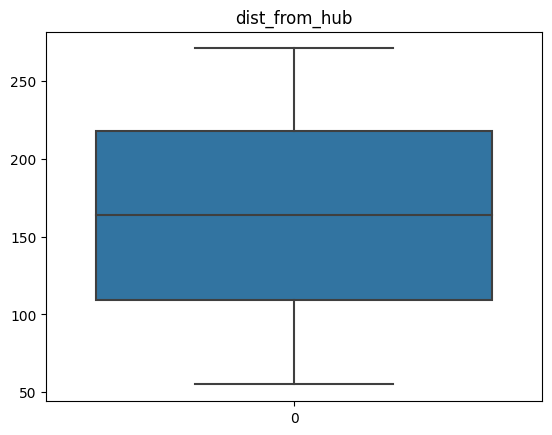

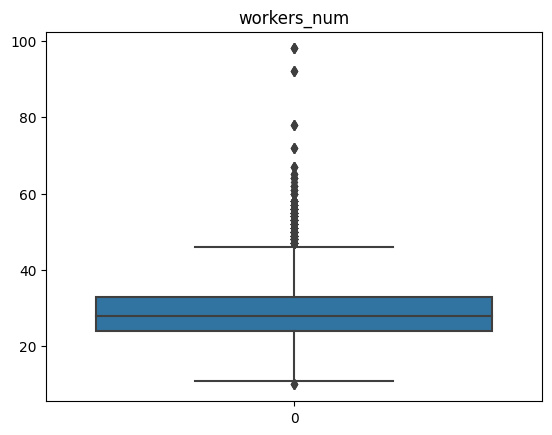

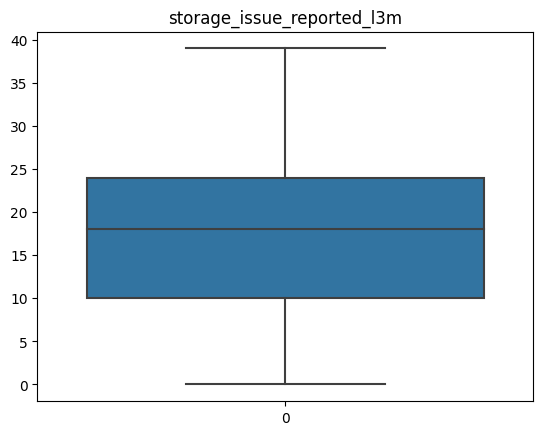

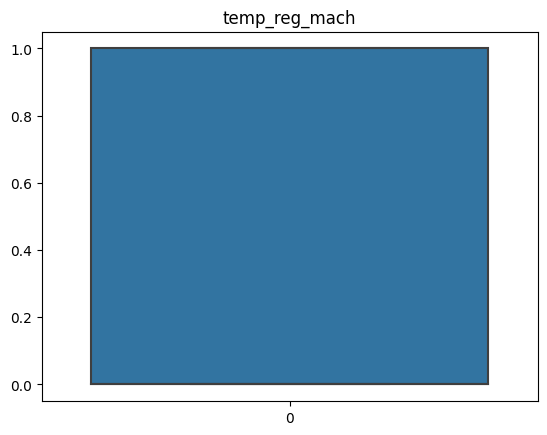

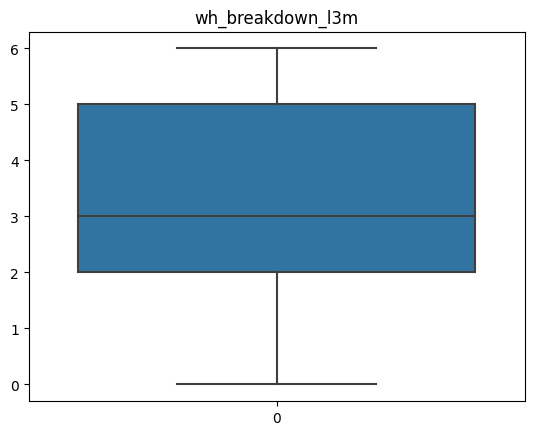

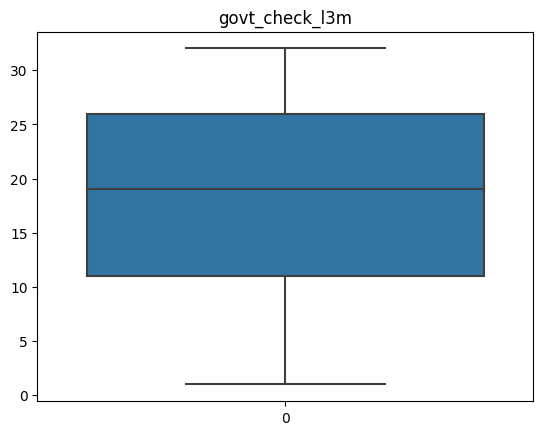

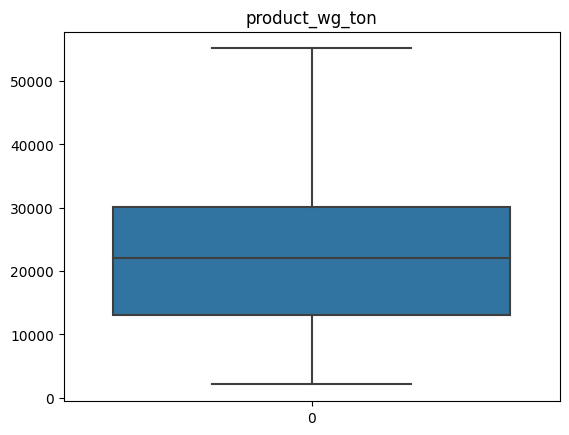

In [18]:

col=[ 'Competitor_in_mkt', 'retail_shop_num',
       'distributor_num', 'flood_impacted', 'flood_proof',
       'electric_supply', 'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton']
for i in col:
  sns.boxplot(df[i])
  plt.title(i)
  plt.show()

workers number ,retail shop number and workers number have outliers

<Axes: xlabel='Location_type', ylabel='retail_shop_num'>

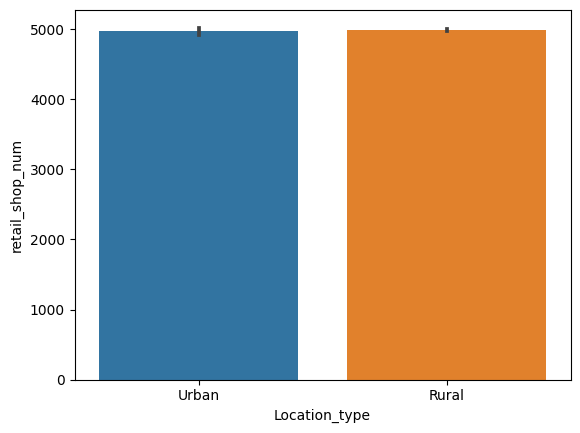

In [20]:
#Linear Regression
df.head(5)



,Unnamed: 0,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,...,1,91,29.0,0.0,13,0,A,5,15,17115
1,1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,...,1,210,31.0,0.0,4,0,A,3,17,5074
2,2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,...,0,161,37.0,0.0,17,0,A,6,22,23137
3,3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,...,0,103,21.0,0.0,17,1,A+,3,27,22115
4,4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,...,1,112,25.0,2009.0,18,0,C,6,24,24071


In [21]:
new_data=df.loc[:,['num_refill_req_l3m','transport_issue_l1y','flood_impacted','Competitor_in_mkt','retail_shop_num','dist_from_hub','workers_num','wh_breakdown_l3m','storage_issue_reported_l3m','product_wg_ton']]

In [22]:
x=new_data.iloc[:,:-1].values
y=new_data.iloc[:,-1].values

In [23]:
new_data.head(5)

,num_refill_req_l3m,transport_issue_l1y,flood_impacted,Competitor_in_mkt,retail_shop_num,dist_from_hub,workers_num,wh_breakdown_l3m,storage_issue_reported_l3m,product_wg_ton
0,3,1,0,2,4651,91,29.0,5,13,17115
1,0,0,0,4,6217,210,31.0,3,4,5074
2,1,0,0,4,4306,161,37.0,6,17,23137
3,7,4,0,2,6000,103,21.0,3,17,22115
4,3,1,1,2,4740,112,25.0,6,18,24071


In [24]:
#splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [25]:
x_train.shape

(11634, 9)

In [26]:
x_test

array([[ 1.,  0.,  0., ..., 29.,  2., 24.],
       [ 3.,  0.,  0., ..., 24.,  6., 25.],
       [ 3.,  2.,  0., ..., 29.,  4., 18.],
       ...,
       [ 0.,  0.,  0., ..., 29.,  2., 10.],
       [ 2.,  3.,  0., ..., 28.,  2., 21.],
       [ 2.,  0.,  0., ..., 22.,  4., 16.]])

In [27]:
#linear regression
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [28]:
y_pred=regressor.predict(x_test)
x_test

array([[ 1.,  0.,  0., ..., 29.,  2., 24.],
       [ 3.,  0.,  0., ..., 24.,  6., 25.],
       [ 3.,  2.,  0., ..., 29.,  4., 18.],
       ...,
       [ 0.,  0.,  0., ..., 29.,  2., 10.],
       [ 2.,  3.,  0., ..., 28.,  2., 21.],
       [ 2.,  0.,  0., ..., 22.,  4., 16.]])

In [29]:
y_pred

array([31208.25476734, 31551.43027898, 22682.84186982, ...,
       13515.76500202, 26497.87330349, 20701.28031199])

In [30]:
y_test

array([27055, 33085, 21064, ..., 13121, 27091, 19119])

In [31]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred)

In [32]:
r2

0.9755429075543642

In [37]:
#Decision Tree Algorithm
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
y_pred1=regressor.predict(x_test)
x_test

array([[ 1.,  0.,  0., ..., 29.,  2., 24.],
       [ 3.,  0.,  0., ..., 24.,  6., 25.],
       [ 3.,  2.,  0., ..., 29.,  4., 18.],
       ...,
       [ 0.,  0.,  0., ..., 29.,  2., 10.],
       [ 2.,  3.,  0., ..., 28.,  2., 21.],
       [ 2.,  0.,  0., ..., 22.,  4., 16.]])

In [40]:
y_pred1

array([30074., 32099., 20141., ..., 12129., 25080., 20083.])

In [41]:
y_test

array([27055, 33085, 21064, ..., 13121, 27091, 19119])

In [43]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred1)
r2

0.967472116594239

DATA VISUALIZATION

In [35]:
corr=new_data.corr()
corr

,num_refill_req_l3m,transport_issue_l1y,flood_impacted,Competitor_in_mkt,retail_shop_num,dist_from_hub,workers_num,wh_breakdown_l3m,storage_issue_reported_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.023180,-0.015214,0.019149,-0.005090,-0.000909,-0.013595,0.000249,-0.008875,-0.000646
transport_issue_l1y,0.023180,1.000000,-0.009324,-0.010148,0.000400,0.009382,-0.006579,0.014092,-0.152709,-0.183150
flood_impacted,-0.015214,-0.009324,1.000000,0.012223,-0.010186,0.013265,0.150915,0.000643,-0.001571,-0.000507
Competitor_in_mkt,0.019149,-0.010148,0.012223,1.000000,-0.155607,0.014434,-0.013998,0.014849,0.011957,0.010854
retail_shop_num,-0.005090,0.000400,-0.010186,-0.155607,1.000000,-0.000910,-0.009738,0.000558,-0.008094,-0.008332
dist_from_hub,-0.000909,0.009382,0.013265,0.014434,-0.000910,1.000000,-0.013109,0.002410,-0.011496,-0.011380
workers_num,-0.013595,-0.006579,0.150915,-0.013998,-0.009738,-0.013109,1.000000,-0.012428,-0.006123,-0.005898
wh_breakdown_l3m,0.000249,0.014092,0.000643,0.014849,0.000558,0.002410,-0.012428,1.000000,0.379624,0.345474
storage_issue_reported_l3m,-0.008875,-0.152709,-0.001571,0.011957,-0.008094,-0.011496,-0.006123,0.379624,1.000000,0.986716
product_wg_ton,-0.000646,-0.183150,-0.000507,0.010854,-0.008332,-0.011380,-0.005898,0.345474,0.986716,1.000000


<Axes: >

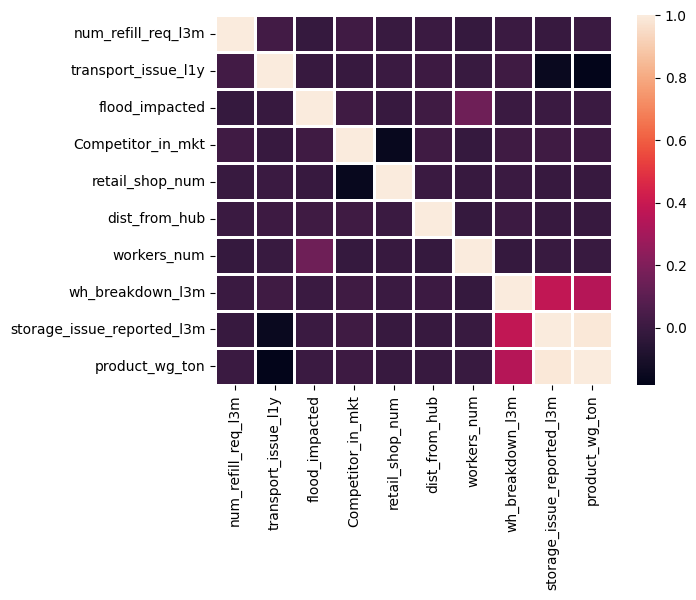

In [36]:
sns.heatmap(corr,linewidth=0.8)

Relationship between retail shop number and location type


<Axes: xlabel='Location_type', ylabel='retail_shop_num'>

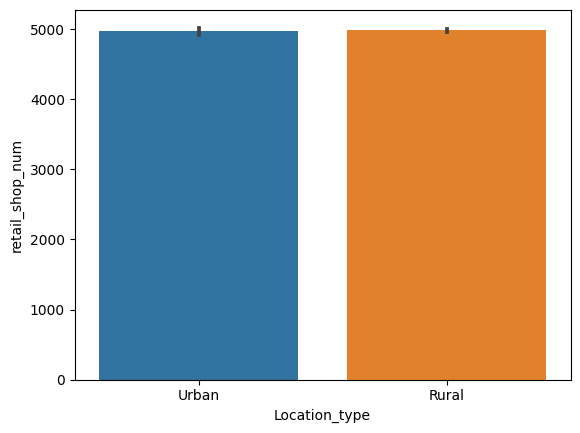

In [33]:
sns.barplot(x='Location_type',y='retail_shop_num', data=df)

Relationship between wharehouse capacity and product weight tone.

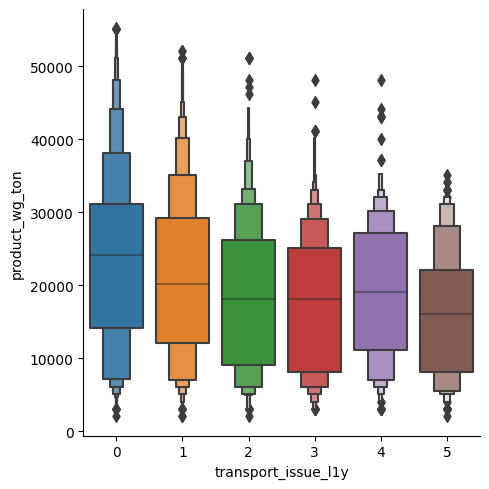

In [45]:
sns.catplot(x='transport_issue_l1y',y='product_wg_ton',kind="boxen",data=new_data)

Relationship between warehouse capacity and number of workers

<Axes: xlabel='WH_capacity_size', ylabel='workers_num'>

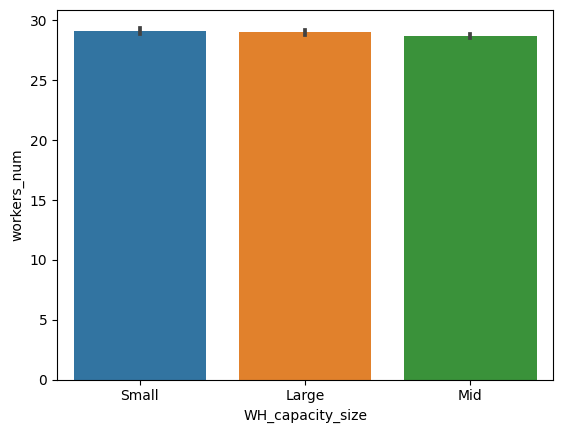

In [46]:
sns.barplot(x='WH_capacity_size',y='workers_num', data=df)

Relationship between product transported vs flood impacted area

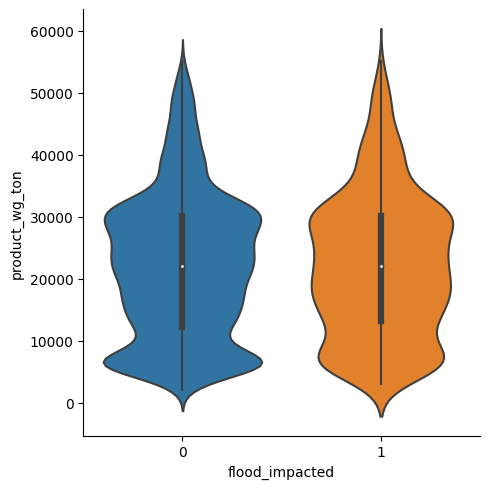

In [48]:
sns.catplot(x='flood_impacted',y='product_wg_ton',kind='violin',data=new_data)

<ipython-input-52-52e1ffdd3c20>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_data['product_wg_ton'], color="orange")


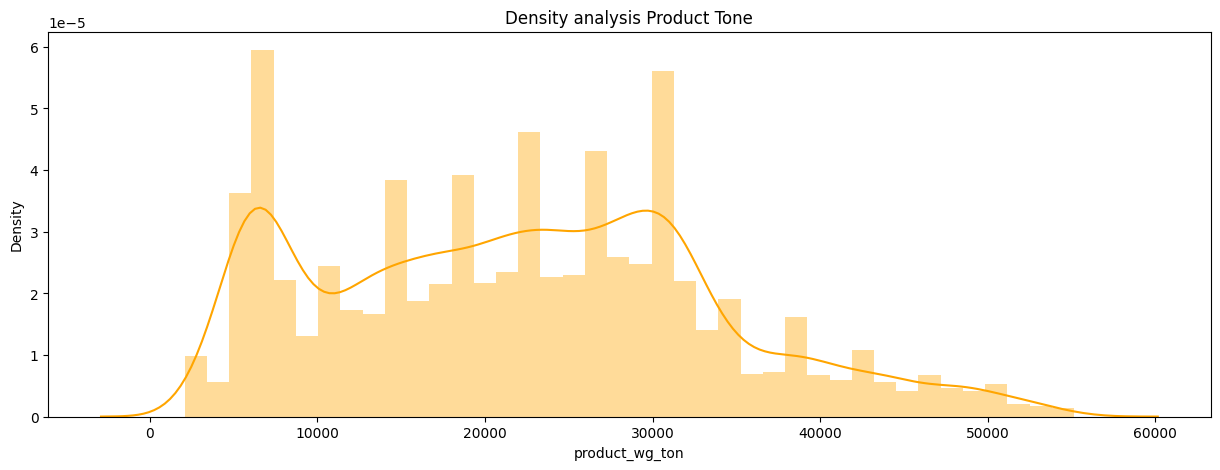

In [52]:
# House Age Distribution
plt.figure(figsize=(15,5))
sns.distplot(new_data['product_wg_ton'], color="orange")
plt.title("Density analysis Product Tone")
plt.ylabel("Density")
plt.xlabel("product_wg_ton");

Relationship between Warehouse capacity and storage issues

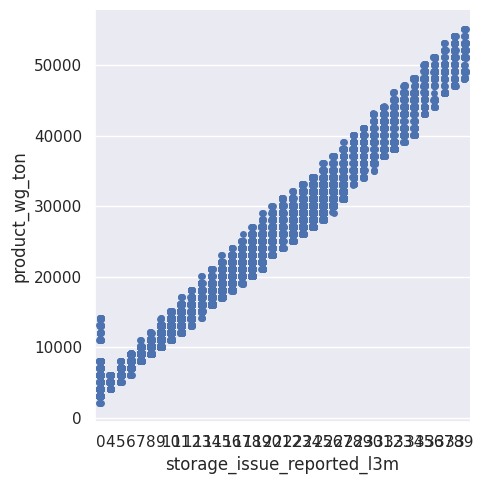

In [66]:
sns.catplot(x='storage_issue_reported_l3m',y='product_wg_ton', data=new_data)

<Axes: xlabel='electric_supply', ylabel='product_wg_ton'>

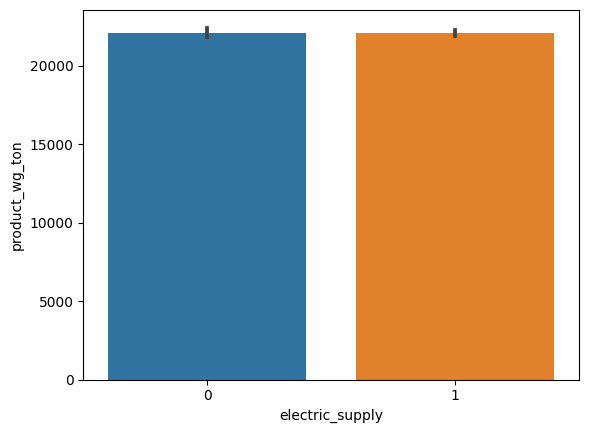

In [61]:
sns.barplot(x='electric_supply',y='product_wg_ton', data=df)

<Axes: xlabel='approved_wh_govt_certificate', ylabel='product_wg_ton'>

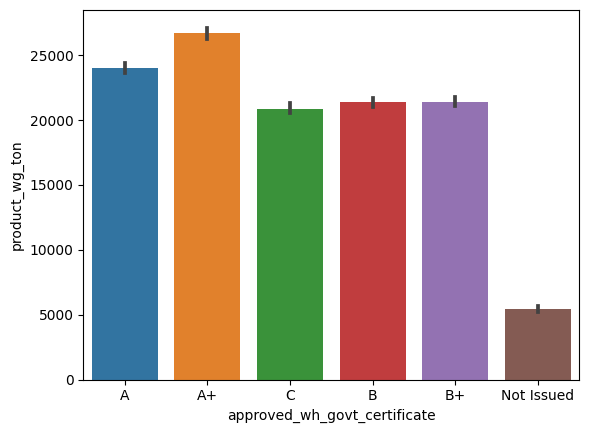

In [62]:
sns.barplot(x='approved_wh_govt_certificate',y='product_wg_ton', data=df)

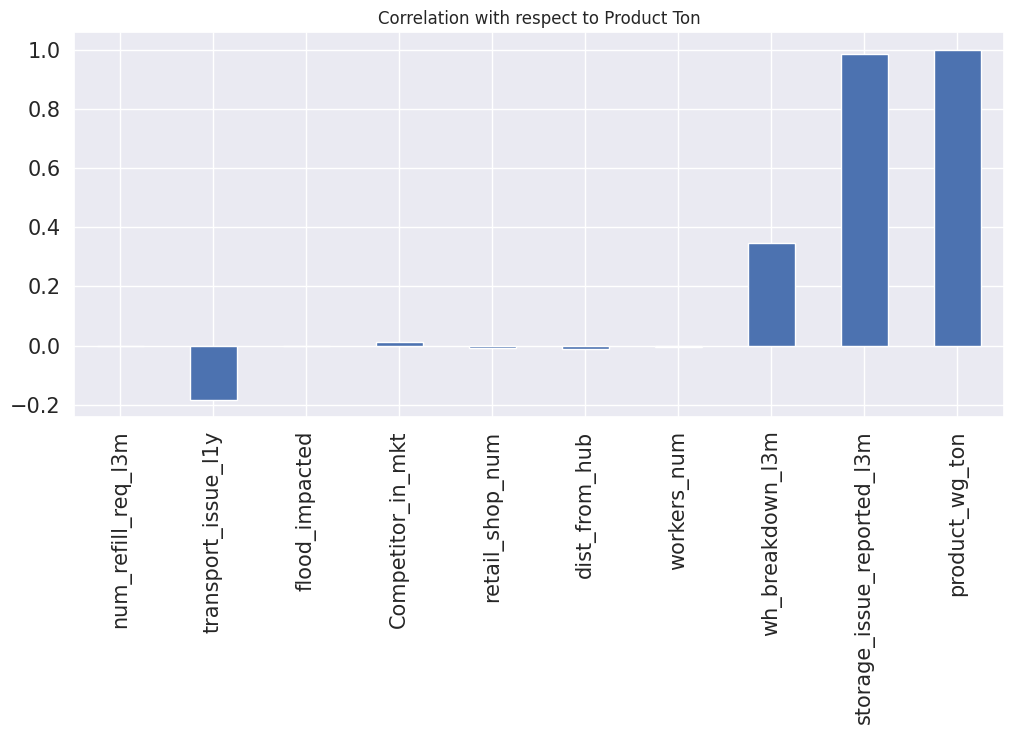

In [63]:
# Features having coorelation to price
sns.set(color_codes=True)
new_data.corrwith(new_data.product_wg_ton).plot.bar( figsize = (12, 5), title = "Correlation with respect to Product Ton", fontsize = 15, rot = 90, grid = True);